In [11]:
import math
import pickle
import gzip
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [147]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [125]:
speech_features = pd.read_csv("pd_speech_features.csv", header=1)
num_ids = speech_features["id"].max()
rows = []
#average all the trials per participant id
for i in range(num_ids):
    id_vals = speech_features[speech_features["id"]==i]
    id_mean = id_vals.mean(axis=0)
    rows.append(id_mean)

speech_features = pd.DataFrame(rows, columns=speech_features.columns)
y = speech_features["class"]
speech_features = speech_features.drop(columns="class")
X = StandardScaler().fit_transform(speech_features)
X = pd.DataFrame(X, columns=speech_features.columns)
X.drop(columns="id", inplace=True)

In [113]:
have_parkinsons = speech_features[speech_features["class"]==1]
have_not_parkinsons = speech_features[speech_features["class"]==0]
have_parkinsons.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.0,1.0,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1.0
1,1.0,0.0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1.0
2,2.0,1.0,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1.0
3,3.0,0.0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1.0
4,4.0,0.0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1.0


[Text(0, 0, 'No Parkinsons'), Text(0, 0, 'Parkinsons')]

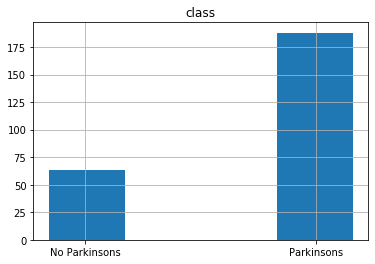

In [114]:
axs = speech_features.hist("class", bins=[0,.25,.5,.75, 1])
axs[0,0].set_xticks([.12, .88])
axs[0,0].set_xticklabels(['No Parkinsons', 'Parkinsons'])

[Text(0, 0, 'female'), Text(0, 0, 'male')]

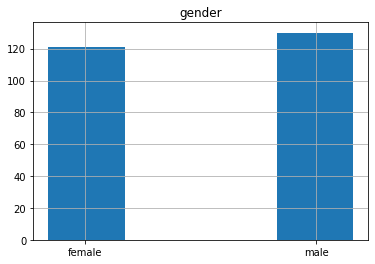

In [115]:
axs = speech_features.hist("gender", bins=[0,.25,.5,.75, 1])
axs[0,0].set_xticks([.12, .88])
axs[0,0].set_xticklabels(['female', 'male'])

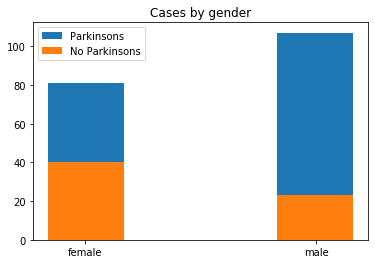

In [116]:
fig, ax = plt.subplots()
ax.hist(speech_features[speech_features["class"]==1].gender, label="Parkinsons",bins=[0,.25,.5,.75, 1])
ax.hist(speech_features[speech_features["class"]==0].gender, label="No Parkinsons",bins=[0,.25,.5,.75, 1])
ax.set_xticks([.12, .88])
ax.set_xticklabels(['female', 'male'])
ax.set_title("Cases by gender")
ax.legend()

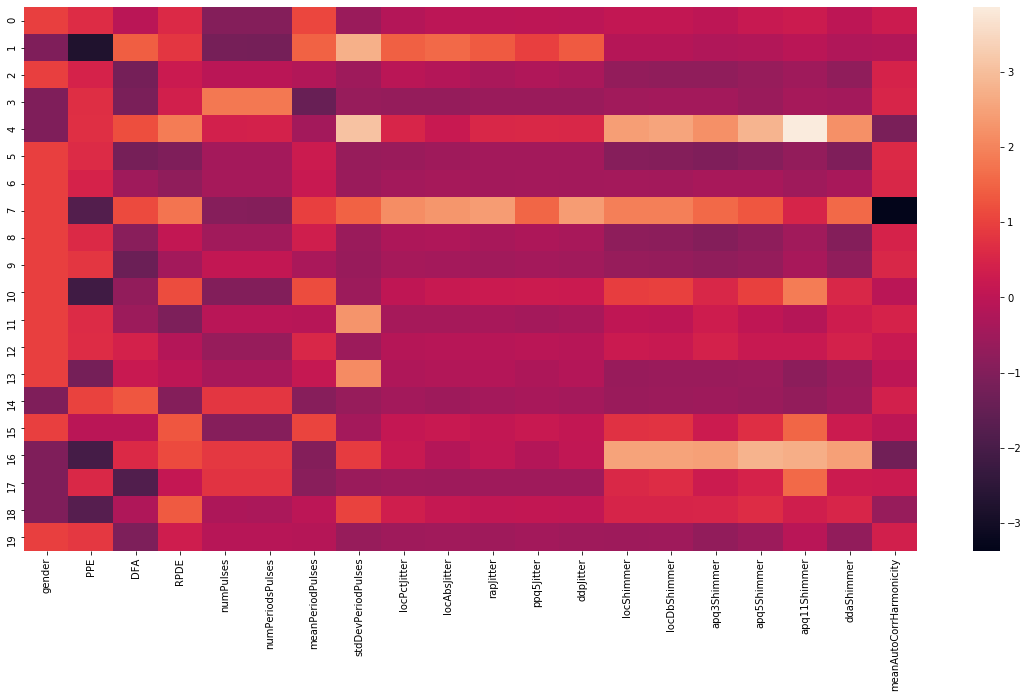

In [141]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(X.iloc[0:20, 0:20])

Shows heatmap correlation for first 20 features. As you can see, there is a lot of inter-relatedness

In [143]:
pca = PCA(n_components=.99, svd_solver='full')
print("Before PCA, number of features is: ", X.shape[1])
X_new = pca.fit_transform(X)
print("After PCA, number of features is: ", X_new.shape[1])
totals = np.cumsum(pca.explained_variance_ratio_)
expl_var = pca.explained_variance_ratio_

Before PCA, number of features is:  753
After PCA, number of features is:  171


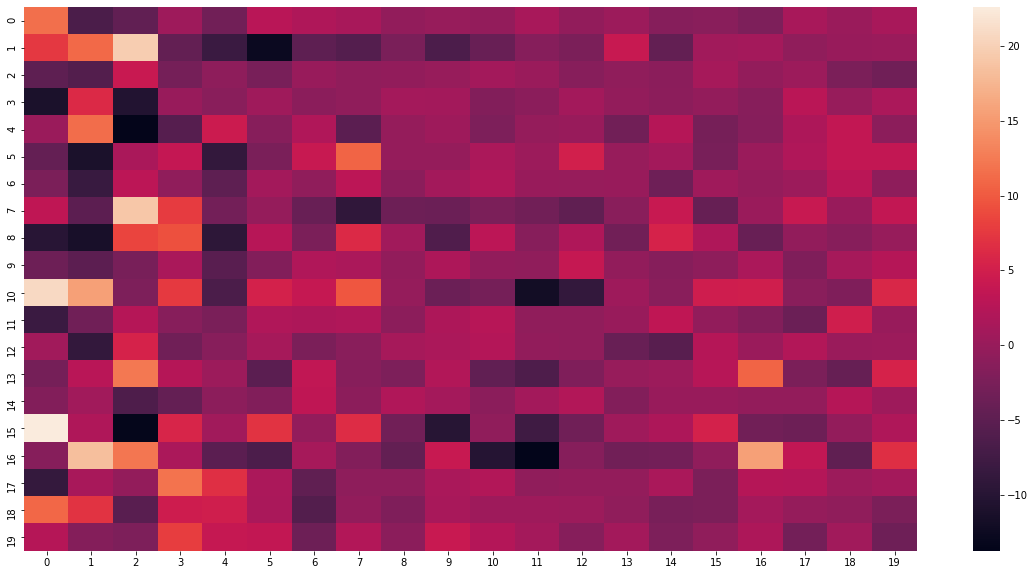

In [146]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(X_new[0:20, 0:20])

After feature analysis using PCA, features are a less correlated 

In [154]:
features = SelectKBest(k=10)
features.fit_transform(X, y)
print("The 10 best features as dictated by k best are\n\n", X.columns[features.get_support(True)])

The 10 best features as dictated by k best are

 Index(['mean_MFCC_2nd_coef', 'std_8th_delta_delta', 'std_9th_delta_delta',
       'tqwt_stdValue_dec_11', 'tqwt_stdValue_dec_12', 'tqwt_minValue_dec_11',
       'tqwt_minValue_dec_12', 'tqwt_maxValue_dec_11', 'tqwt_maxValue_dec_12',
       'tqwt_kurtosisValue_dec_27'],
      dtype='object')


In [156]:
features = SelectKBest(k=1)
features.fit_transform(X, y)
X.columns[features.get_support(True)]

Index(['tqwt_minValue_dec_12'], dtype='object')

Text(0.5, 1.0, 'Distribution of best selected feature')

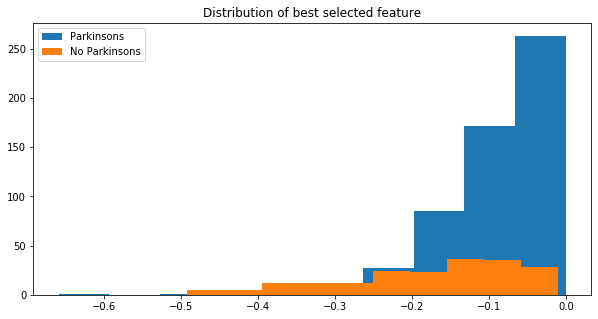

In [165]:
fig, ax = plt.subplots(figsize=(10,5))
speech_features = pd.read_csv("pd_speech_features.csv", header=1)
ax.hist(speech_features[speech_features["class"]==1].tqwt_minValue_dec_12, label="Parkinsons")
ax.hist(speech_features[speech_features["class"]==0].tqwt_minValue_dec_12, label="No Parkinsons")
ax.legend()
ax.set_title("Distribution of best selected feature")